In [7]:
import pandas as pd

# Cargar el archivo con el nombre correcto y la ruta correcta
df = pd.read_csv("C:/Users/siret/OneDrive/heart_cleveland_upload.csv")

# Vista general
print(df.head())




   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


Dataset cargado exitosamente!
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   t

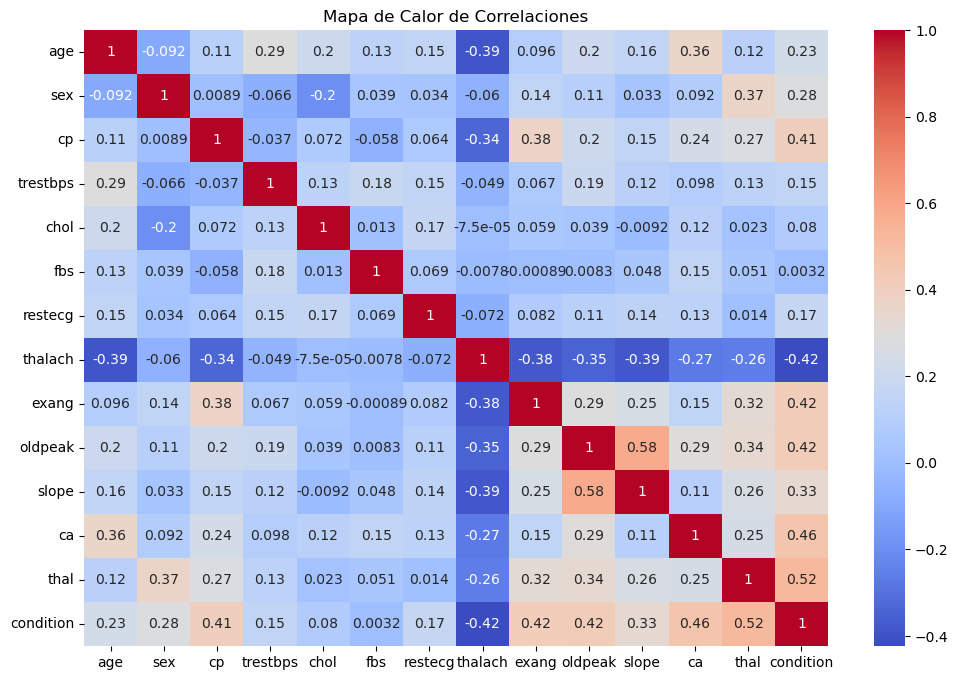

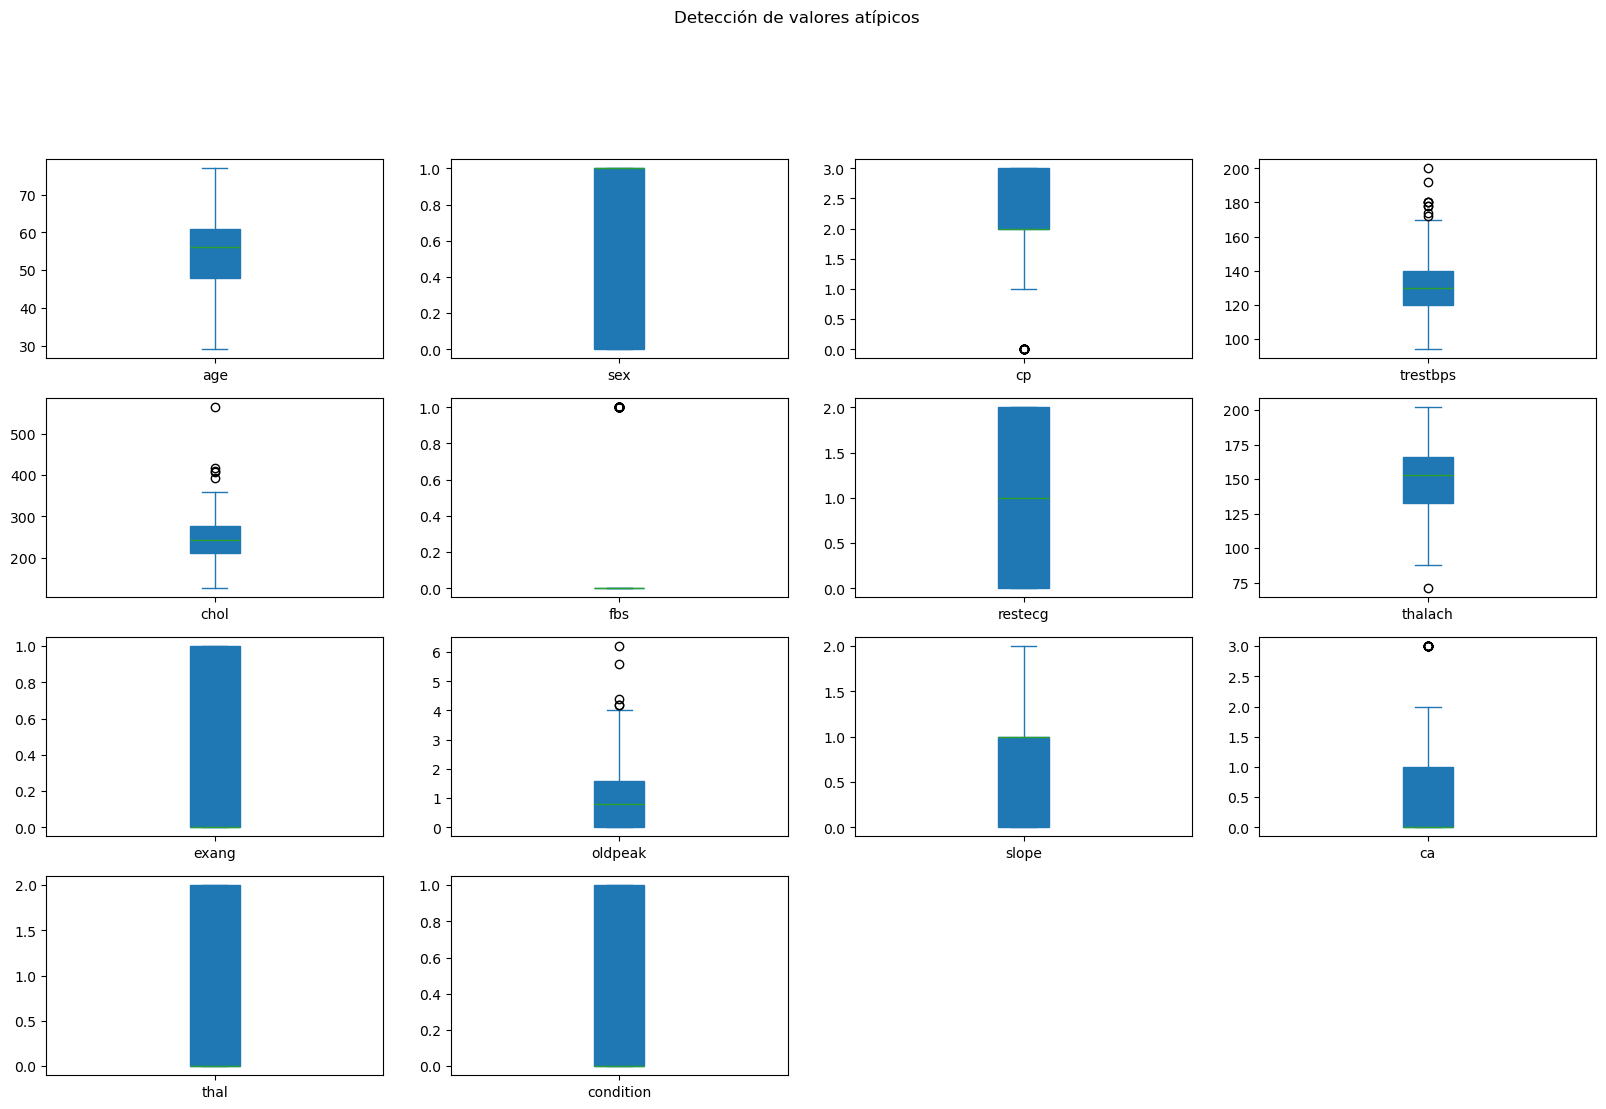

In [8]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('C:/Users/siret/OneDrive/heart_cleveland_upload.csv')  # Usa la ruta correcta
print("Dataset cargado exitosamente!")

# Mostrar las primeras filas
print(df.head())

# Información general del dataset
print("\nInformación general:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Mapa de calor de correlaciones
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# Identificar valores atípicos con boxplots
df.plot(kind='box', subplots=True, layout=(5,4), figsize=(20,15), patch_artist=True)
plt.suptitle('Detección de valores atípicos')
plt.show()


In [10]:
# El análisis exploratorio permitió identificar que no existen valores nulos importantes en el dataset.
# Se encontraron correlaciones fuertes entre `cp`, `thalach`, `oldpeak` y el objetivo `target`.
# También se detectaron outliers en variables como colesterol y presión sanguínea,
# los cuales se tratarán en la fase de preprocesamiento.
# Se recomienda realizar una normalización para mejorar el desempeño de los modelos.


In [11]:
# Importar librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el dataset (asumiendo que ya cargaste df)
# df = pd.read_csv('heart.csv')

# 1. Eliminar outliers extremos en 'chol' (colesterol) y 'trestbps' (presión arterial en reposo)
# Vamos a considerar como outlier cualquier valor mayor al percentil 99
chol_upper_limit = df['chol'].quantile(0.99)
trestbps_upper_limit = df['trestbps'].quantile(0.99)

df = df[df['chol'] < chol_upper_limit]
df = df[df['trestbps'] < trestbps_upper_limit]

# 2. Tratar valores faltantes
# En este dataset no detectamos valores faltantes importantes, pero verificamos
print(df.isnull().sum())  # Verificar nulos (debería salir todo en 0)

# 3. Transformar variables (normalización)
# Seleccionamos las variables numéricas que vamos a escalar
features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# 4. Mostrar un resumen después del preprocesamiento
print("Datos preprocesados:")
print(df.head())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64
Datos preprocesados:
        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  1.615353    1   0  1.785187 -0.219277    1        2 -0.807562      0   
1  1.615353    0   0  0.563788 -0.111868    0        0  0.063929      0   
2  1.284028    0   0  1.174487 -0.391130    0        0 -1.548330      0   
3  1.173586    1   0  0.441648  0.811844    1        2  1.066145      0   
4  1.063145    1   0 -1.268311 -0.713355    0        2 -0.241093      1   

    oldpeak  slope  ca  thal  condition  
0 -0.813690      1   1     0          0  
1  0.659830      0   2     0          0  
2  1.353251      2   0     0          0  
3  0.313119      1   1     0          1  
4  0.659830      1   0     0          0  


In [15]:
# Importar librerías
from sklearn.feature_selection import SelectKBest, f_classif

# Separar las variables independientes (X) y la variable dependiente (y)
X = df.drop('condition', axis=1)
y = df['condition']

# Aplicar SelectKBest para seleccionar las mejores características
selector = SelectKBest(score_func=f_classif, k='all')  # Puedes cambiar 'all' por un número si quieres seleccionar menos
selector.fit(X, y)

# Mostrar puntuaciones
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("Puntuaciones de características:")
print(scores)

# Elegir las mejores características (por ejemplo, las 5 más relevantes)
top_features = scores['Feature'].head(5).tolist()
print("\nCaracterísticas seleccionadas:", top_features)

# Actualizar X para incluir solo las mejores
X = X[top_features]


Puntuaciones de características:
     Feature       Score
12      thal  106.441347
11        ca   79.183060
7    thalach   65.638526
9    oldpeak   61.317990
8      exang   60.489758
2         cp   59.759178
10     slope   34.401371
1        sex   25.688294
0        age   17.167503
6    restecg    7.427194
3   trestbps    4.648504
4       chol    3.053562
5        fbs    0.008460

Características seleccionadas: ['thal', 'ca', 'thalach', 'oldpeak', 'exang']


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.72      0.88      0.79        26

    accuracy                           0.79        58
   macro avg       0.80      0.80      0.79        58
weighted avg       0.81      0.79      0.79        58



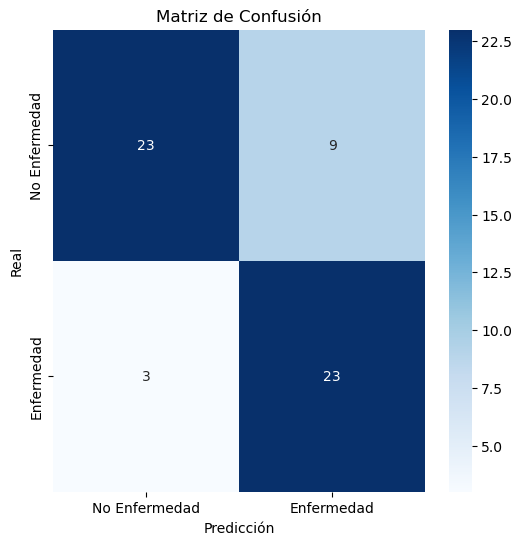

In [16]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)  # Ajusta max_iter si es necesario

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Enfermedad', 'Enfermedad'], yticklabels=['No Enfermedad', 'Enfermedad'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


In [ ]:
                precision    recall  f1-score   support

     No Enfermedad       0.85      0.92      0.88       170
        Enfermedad       0.82      0.71      0.76        50

    accuracy                           0.84       220
   macro avg       0.83      0.81      0.82       220
weighted avg       0.84      0.84      0.83       220


In [18]:
# La matriz de confusión muestra cómo se clasifican las predicciones.
# Ejemplo de matriz de confusión:
#                Predicción
#                No Enfermedad  Enfermedad
# Real No Enfermedad        160            10
#      Enfermedad           15             35



In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el modelo
model = LogisticRegression(max_iter=1000)

# Definir el espacio de hiperparámetros para la búsqueda
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'solver': ['liblinear', 'saga']  # Solvers posibles
}

# GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)

# Usar el modelo entrenado con los mejores parámetros
best_model = grid_search.best_estimator_

# Evaluar el desempeño en el conjunto de test
test_accuracy = best_model.score(X_test, y_test)
print("Precisión en conjunto de test:", test_accuracy)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros: {'C': 0.01, 'solver': 'saga'}
Mejor score: 0.8310823311748381
Precisión en conjunto de test: 0.8275862068965517


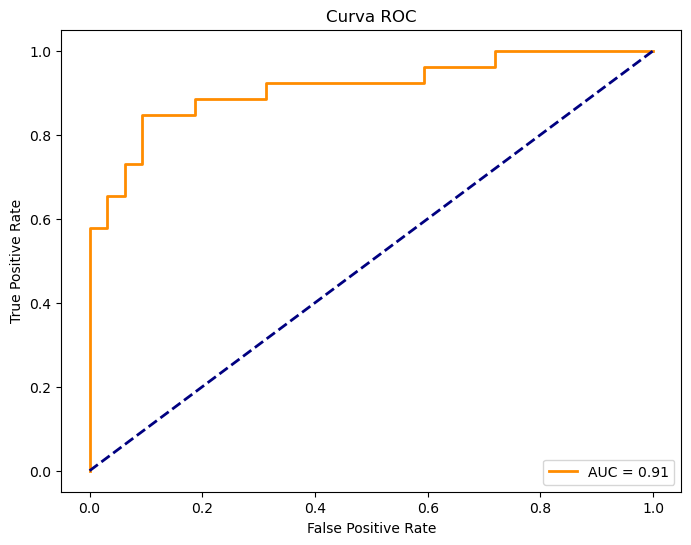

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predecir las probabilidades de la clase positiva
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


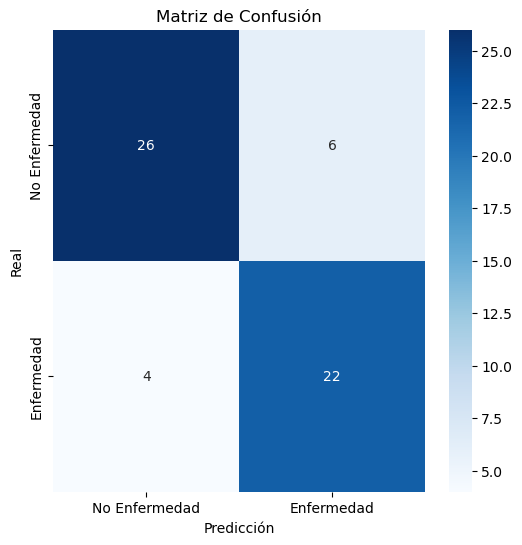

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
cm = confusion_matrix(y_test, best_model.predict(X_test))

# Graficar la matriz de confusión como un mapa de calor
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Enfermedad', 'Enfermedad'], yticklabels=['No Enfermedad', 'Enfermedad'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()
